In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Understanding

In [37]:
df = pd.read_csv('../data/heart_disease_uci.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


(920, 16)

In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


## Handle Missing data

In [13]:
#since it is impossimble to have a cholesterol level of 0, we will replace 0 with NaN
df['chol'] = df['chol'].replace(0, np.nan)
df['trestbps'] = df['trestbps'].replace(0, np.nan)

## Data Visualization


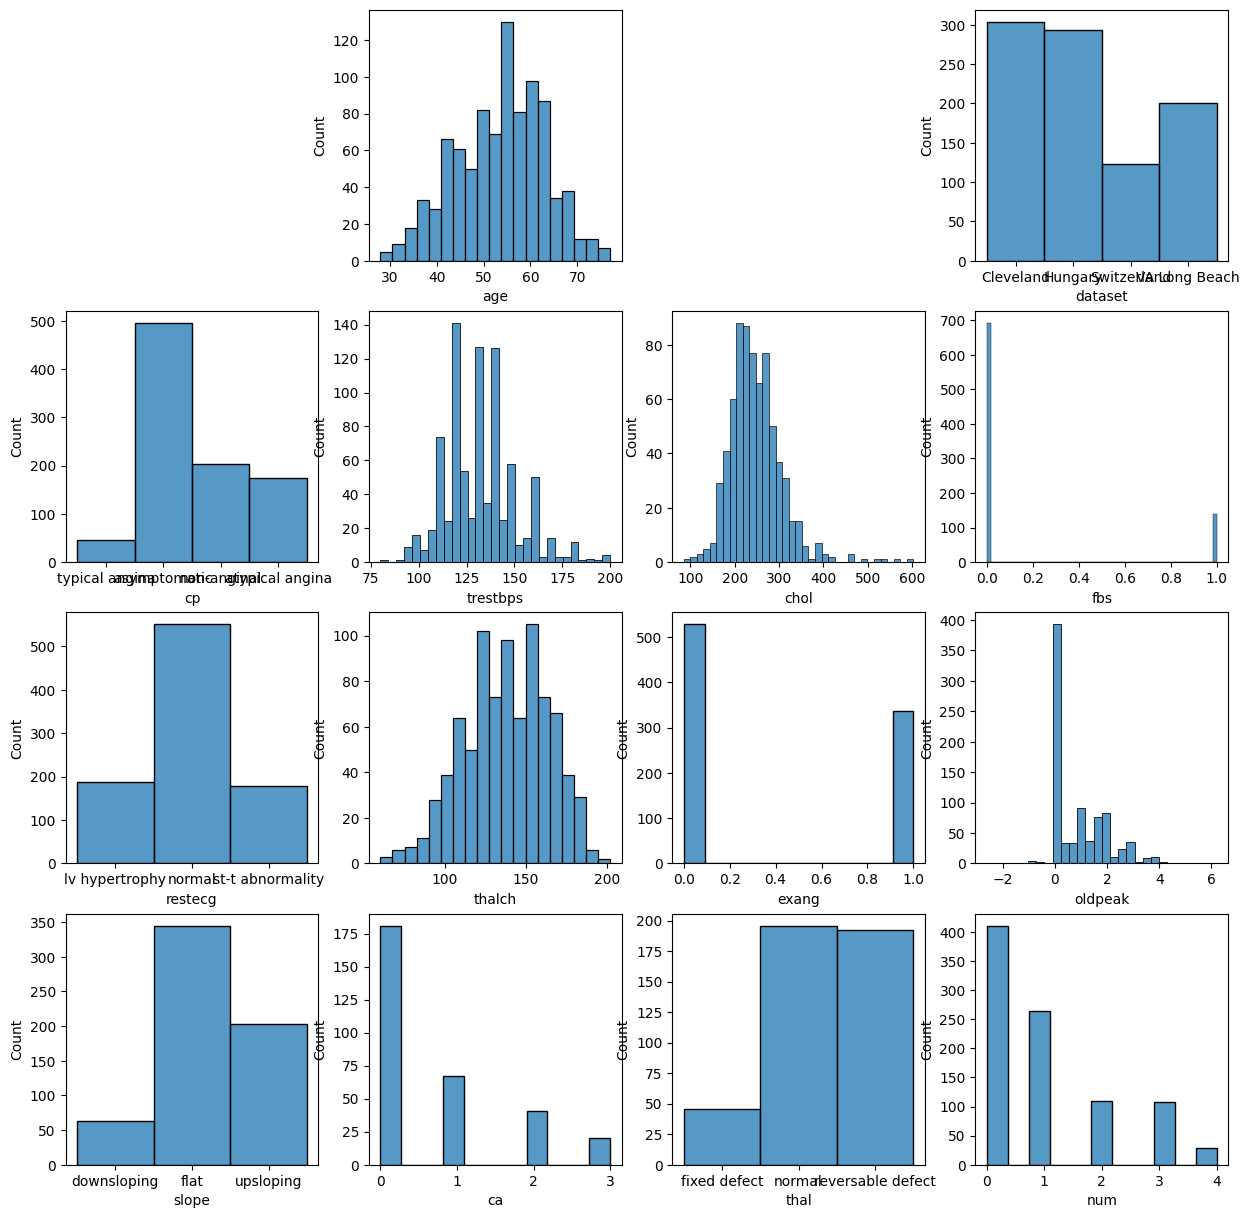

In [14]:
plt.figure(figsize=(15,15))

for i, col in enumerate(df.columns):
    if col == 'Outcome' or col == 'id' or col == 'sex':
        continue
    plt.subplot(4, 4, i+ 1)
    sns.histplot(x=col, data=df)

- Understanding age, sex and dataset columns

sex
Male      726
Female    194
Name: count, dtype: int64


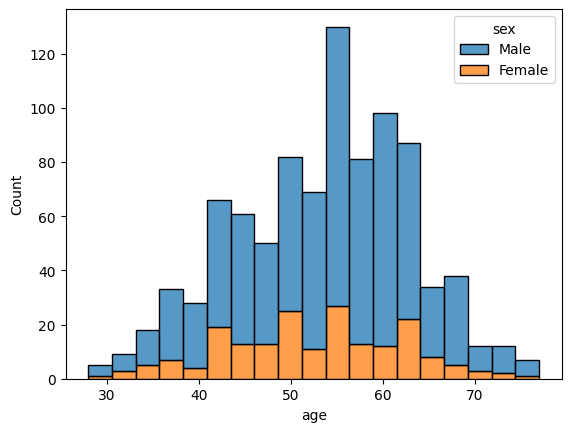

In [15]:
plt.figure()
sns.histplot(data=df, x='age', hue='sex', multiple='stack')  

sex_counts = df['sex'].value_counts()
print(sex_counts)



sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


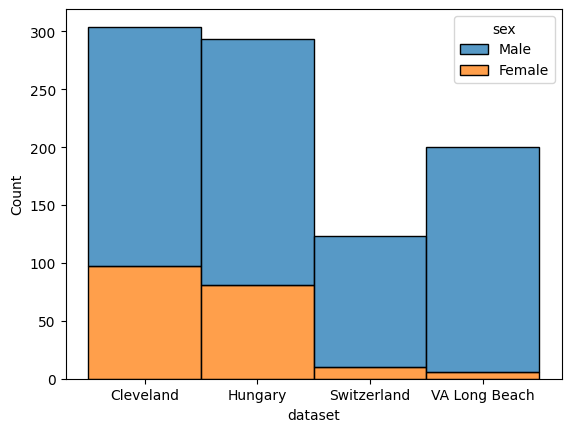

In [16]:
sns.histplot(data=df, x='dataset', hue='sex', multiple='stack')
print(df.groupby('sex')['dataset'].value_counts())


dataset
Cleveland         2.134021
Hungary           2.617284
Switzerland      11.300000
VA Long Beach    32.333333
Name: sex_ratio, dtype: float64


<Axes: xlabel='dataset', ylabel='sex_ratio'>

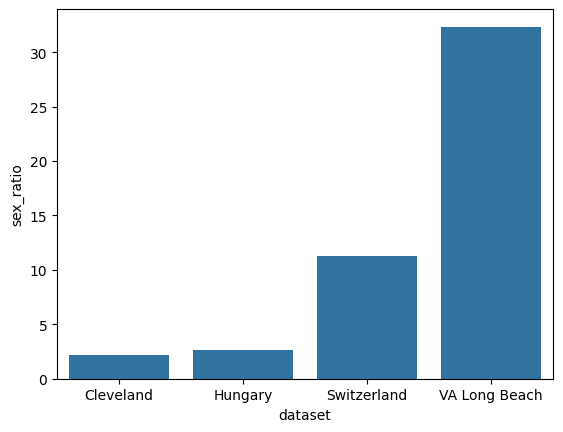

In [17]:
sex_ratio = df.groupby(['dataset', 'sex']).size().unstack().fillna(0)
sex_ratio['sex_ratio'] = sex_ratio['Male'] / sex_ratio['Female']
#plot sex_ratio on histogram
print(sex_ratio['sex_ratio'])
sns.barplot(data=sex_ratio.reset_index(), x='dataset', y='sex_ratio')

<Axes: xlabel='age', ylabel='Count'>

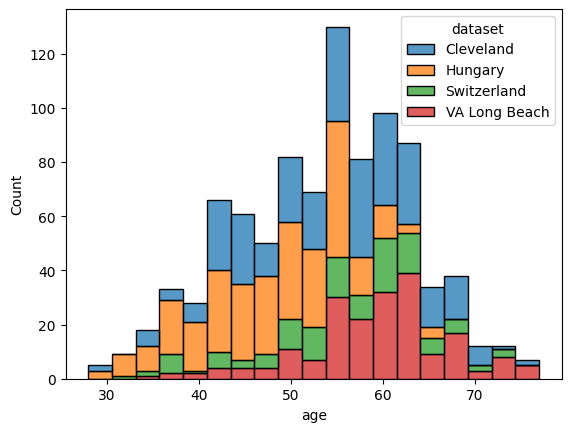

In [18]:
sns.histplot(data=df, x='age', hue='dataset', multiple='stack')  

- Understanding the cp (Chest Pain) Column


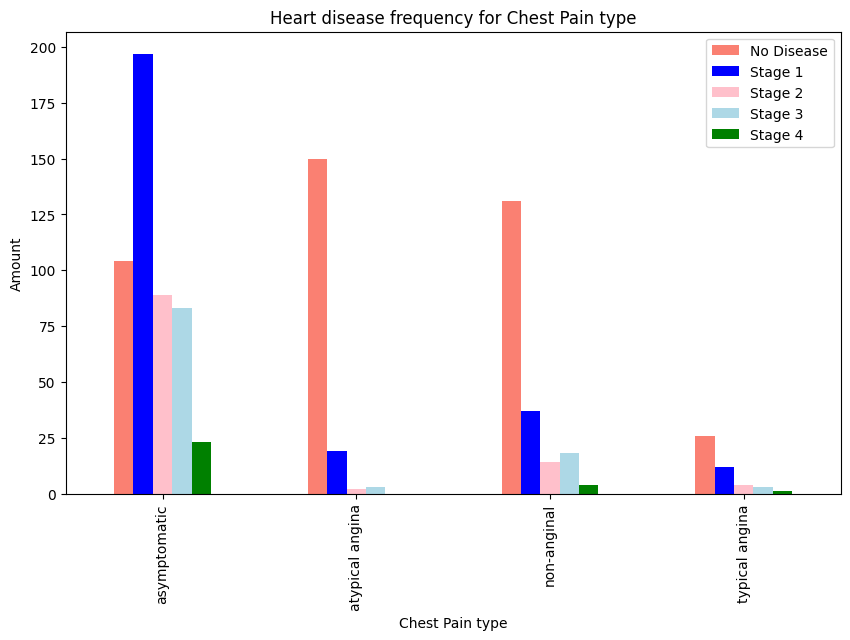

In [19]:
df['cp'].value_counts()
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(10,6), 
                               color = ['salmon','blue','pink','lightblue','green'])
plt.title('Heart disease frequency for Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

<Axes: xlabel='cp', ylabel='Count'>

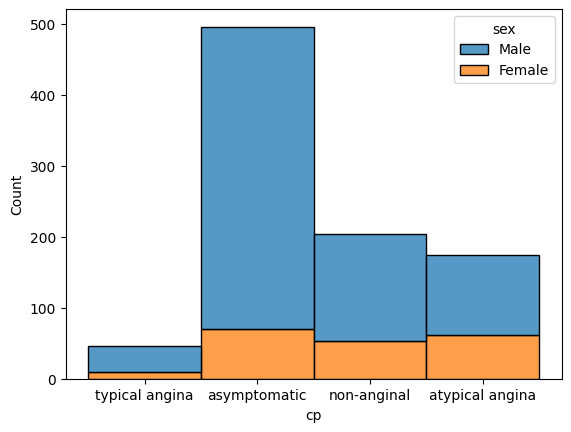

In [20]:
sns.histplot(data=df, x='cp', hue='sex', multiple='stack') 


La figura sopra potrebbe portare a conclusioni fuorvianti, data la distribuzione non uniforme dei sessi nel dataset. Creo quindi un grafico normalizzato.

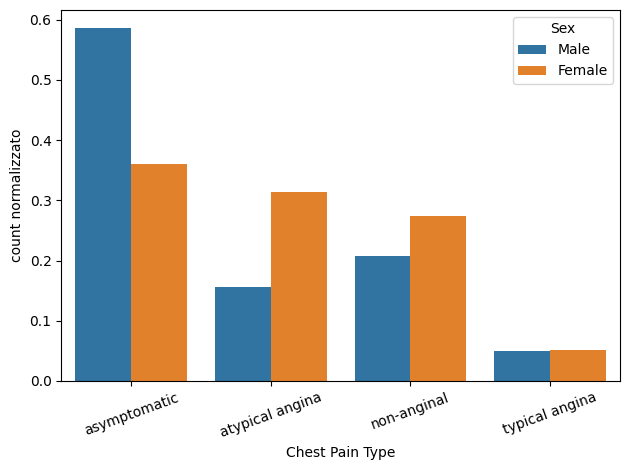

In [21]:
cp_sex_counts = df.groupby(['cp', 'sex']).size().unstack(fill_value=0)
cp_sex_counts['Male_Proportion'] = cp_sex_counts['Male'] / sex_counts['Male']
cp_sex_counts['Female_Proportion'] = cp_sex_counts['Female'] / sex_counts['Female']



df_prop = cp_sex_counts.reset_index()

df_prop_melt = df_prop.melt(id_vars='cp', value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')

# Clean label
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')

# Plot
sns.barplot(data=df_prop_melt, x='cp', y='Proportion', hue='Sex')
plt.ylabel('count normalizzato')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


# Plot cp_sex_counts as a bar plot using seaborn


<Axes: xlabel='cp', ylabel='count'>

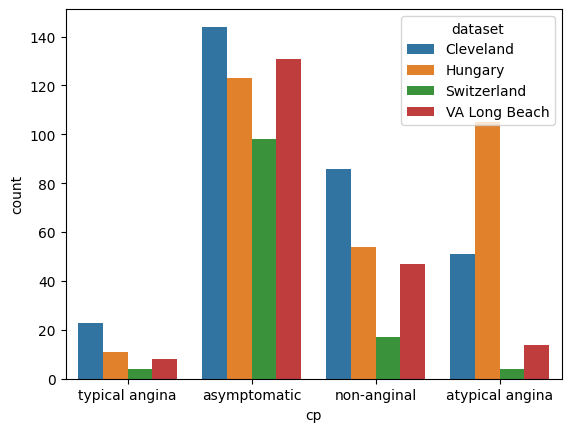

In [22]:
sns.countplot(df, x='cp', hue='dataset')

Anche questo grafico potrebbe portare a conclusioni sbagliate, essendo i dati non normalizzati

Text(0.5, 0, 'Chest Pain Type')

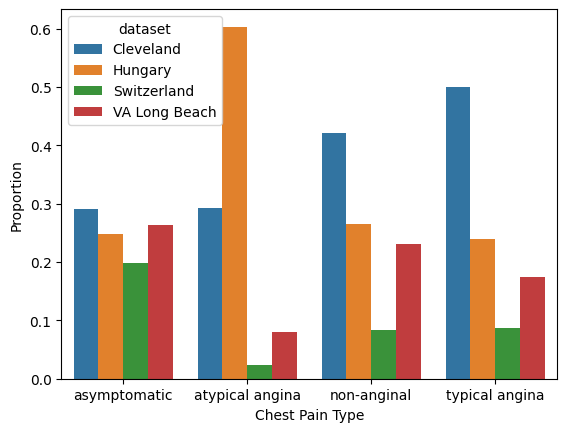

In [23]:
#normalize the counts of cp by dataset, by dividing the counts by the total number of samples in each dataset
cp_normalized = df.groupby(['cp', 'dataset']).size().unstack(fill_value=0)
cp_normalized = cp_normalized.div(cp_normalized.sum(axis=1), axis=0)   
cp_normalized = cp_normalized.reset_index().melt(id_vars='cp', var_name='dataset', value_name='Proportion')
# Plot the normalized counts
sns.barplot(data=cp_normalized, x='cp', y='Proportion', hue='dataset')
plt.ylabel('Proportion')
plt.xlabel('Chest Pain Type')


<Axes: xlabel='age', ylabel='Count'>

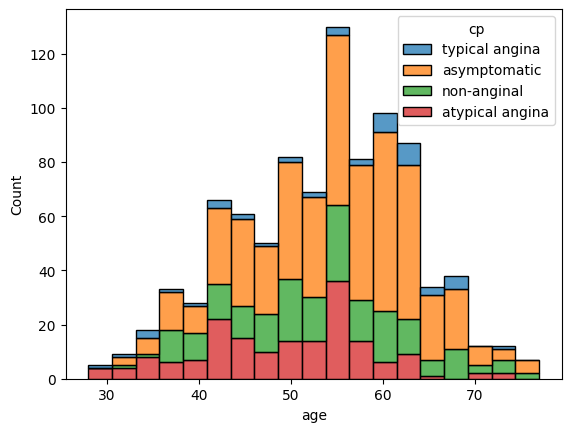

In [24]:
sns.histplot(df, x='age', hue='cp', multiple='stack')

- Studio della colonna trestbps  (resting blood pressure) 

<Axes: xlabel='trestbps', ylabel='Count'>

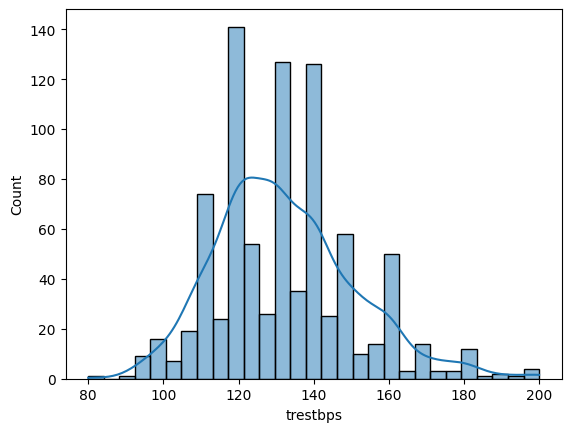

In [25]:
df['trestbps'].describe()
sns.histplot(df['trestbps'], kde=True)

<Axes: ylabel='trestbps'>

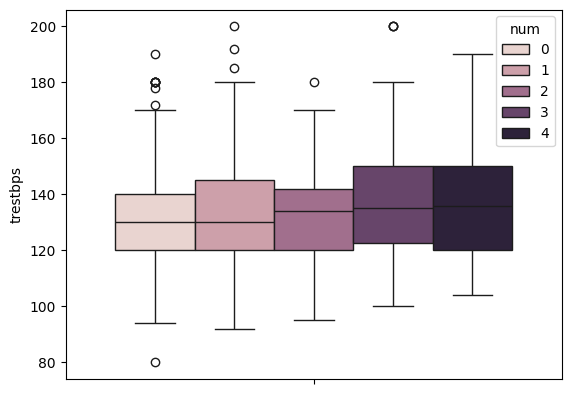

In [26]:
# Confronto tra blood pressure and heart disease
sns.boxplot(y=df['trestbps'], hue=df['num'])


- Studio della colonna chol (cholesterol level)

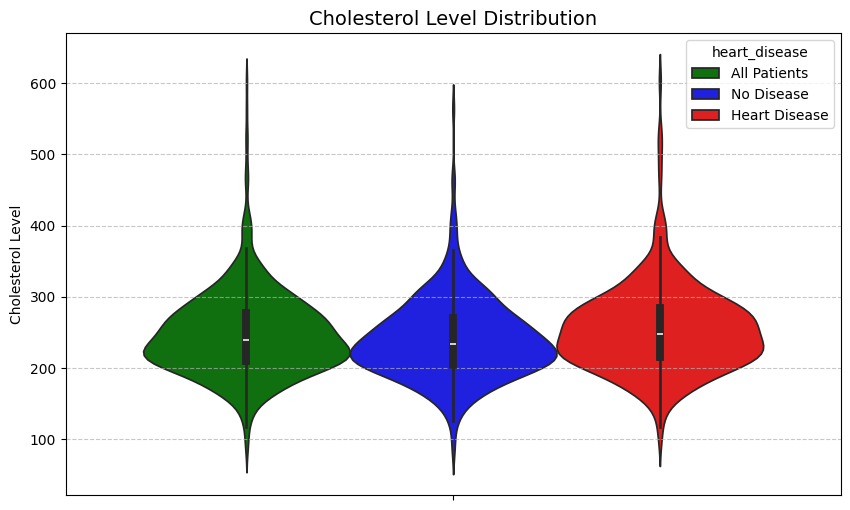

In [27]:
df_labeled = df.copy()
df_labeled['heart_disease'] = df_labeled['num'].apply(lambda x: 'No Disease' if x == 0 else 'Heart Disease')

df_all = df.copy()
df_all['heart_disease'] = 'All Patients'

df_labeled = df_labeled.reset_index(drop=True)
df_all = df_all.reset_index(drop=True)

df_combined = pd.concat([df_all, df_labeled], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_combined, hue='heart_disease', y='chol', palette={
    'All Patients': 'green',
    'No Disease': 'blue',
    'Heart Disease': 'red'
})

plt.title('Cholesterol Level Distribution', fontsize=14)
plt.xlabel('')
plt.ylabel('Cholesterol Level')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


- Studio della colonna thal (thalismia)

<Axes: xlabel='age', ylabel='Count'>

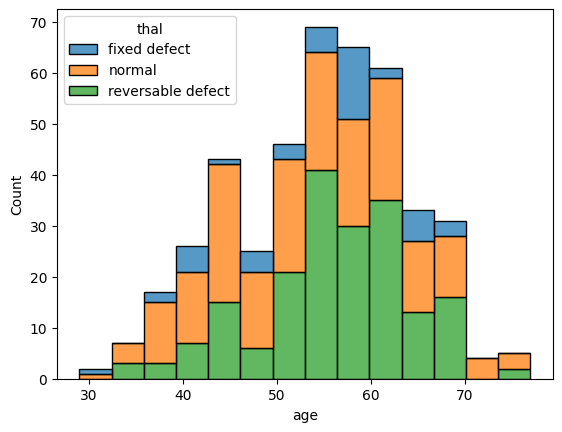

In [28]:
sns.histplot(df, x='age', hue='thal', multiple='stack')

<Axes: xlabel='thal', ylabel='count'>

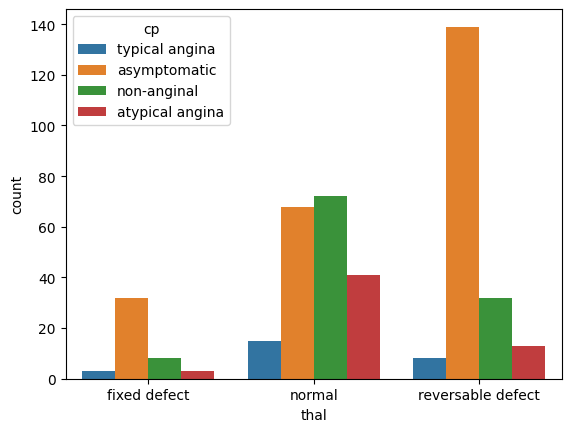

In [29]:
df.groupby('thal')['cp'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='cp')


<Axes: xlabel='thal', ylabel='count'>

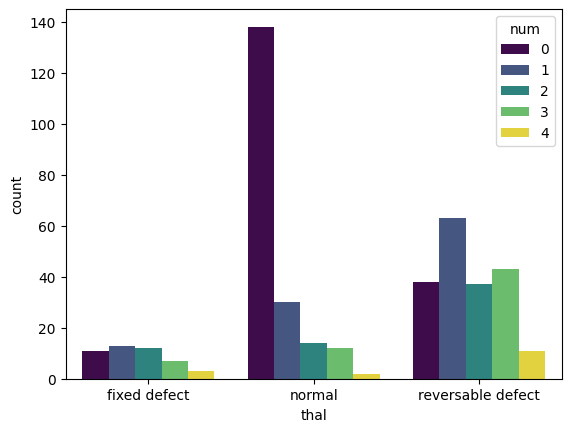

In [30]:
df.groupby('thal')['num'].value_counts()
# Plot to Visualize
sns.countplot(df, x='thal', hue='num' , palette='viridis')

sex                Female  Male  Male_Proportion  Female_Proportion
thal                                                               
fixed defect            4    42         0.130031           0.036036
normal                 86   110         0.340557           0.774775
reversable defect      21   171         0.529412           0.189189


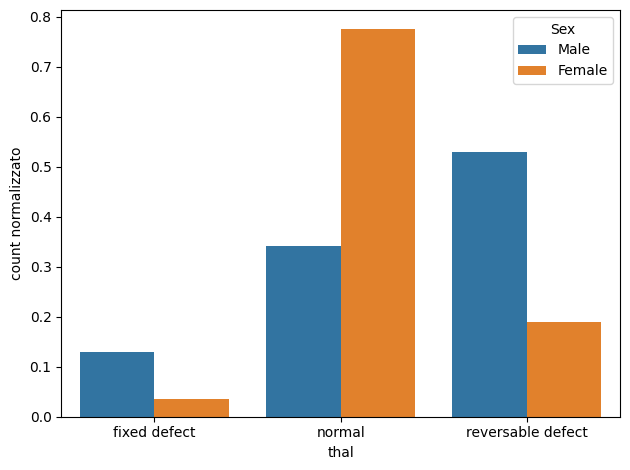

In [31]:
num_males_with_thal = df[df['sex'] == 'Male']['thal'].notnull().sum()
num_females_with_thal = df[df['sex'] == 'Female']['thal'].notnull().sum()


cp_sex_counts = df.groupby(['thal', 'sex']).size().unstack(fill_value=0)
cp_sex_counts['Male_Proportion'] = cp_sex_counts['Male'] / num_males_with_thal
cp_sex_counts['Female_Proportion'] = cp_sex_counts['Female'] / num_females_with_thal
print(cp_sex_counts.head())
df_prop = cp_sex_counts.reset_index()

df_prop_melt = df_prop.melt(id_vars='thal', value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')
2
# Clean label
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')

# Plot
sns.barplot(data=df_prop_melt, x='thal', y='Proportion', hue='Sex')
plt.ylabel('count normalizzato')
plt.tight_layout()
plt.show()


- Esplorazione di num

<Axes: xlabel='num', ylabel='count'>

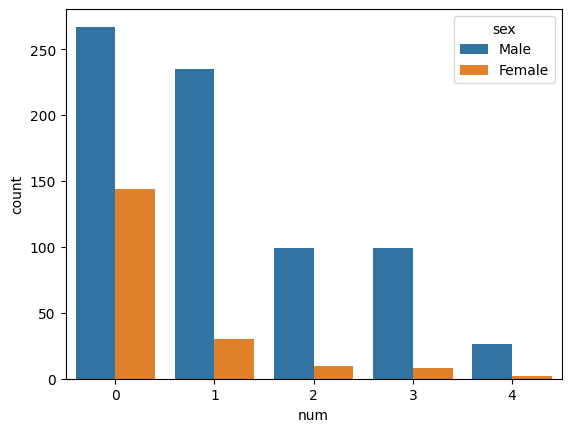

In [32]:
df.groupby('num')['sex'].value_counts()
# Plot to Visualize
sns.countplot(df, x='num', hue='sex')

sex  Female  Male  Male_Proportion  Female_Proportion
num                                                  
0       144   267         0.367769           0.742268
1        30   235         0.323691           0.154639
2        10    99         0.136364           0.051546
3         8    99         0.136364           0.041237
4         2    26         0.035813           0.010309


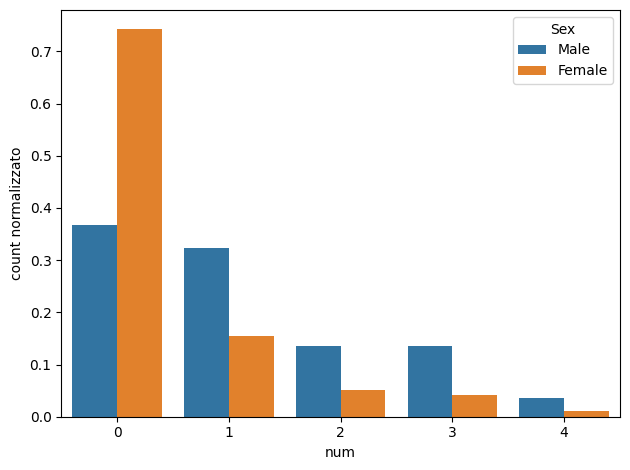

In [33]:
num_males_with_thal = df[df['sex'] == 'Male']['num'].notnull().sum()
num_females_with_thal = df[df['sex'] == 'Female']['num'].notnull().sum()


cp_sex_counts = df.groupby(['num', 'sex']).size().unstack(fill_value=0)
cp_sex_counts['Male_Proportion'] = cp_sex_counts['Male'] / num_males_with_thal
cp_sex_counts['Female_Proportion'] = cp_sex_counts['Female'] / num_females_with_thal
print(cp_sex_counts.head())
df_prop = cp_sex_counts.reset_index()

df_prop_melt = df_prop.melt(id_vars='num', value_vars=['Male_Proportion', 'Female_Proportion'],
                            var_name='Sex', value_name='Proportion')
2
# Clean label
df_prop_melt['Sex'] = df_prop_melt['Sex'].str.replace('_Proportion', '')

# Plot
sns.barplot(data=df_prop_melt, x='num', y='Proportion', hue='Sex')
plt.ylabel('count normalizzato')
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

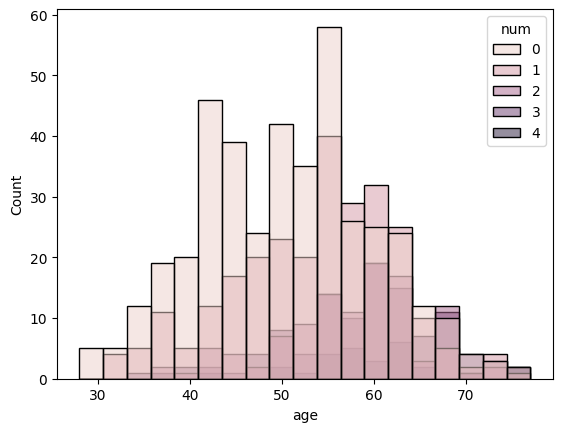

In [34]:
# groupby num by age 
df.groupby('num')['age'].value_counts()
# Plot to Visualize
sns.histplot(df, x='age', hue='num')

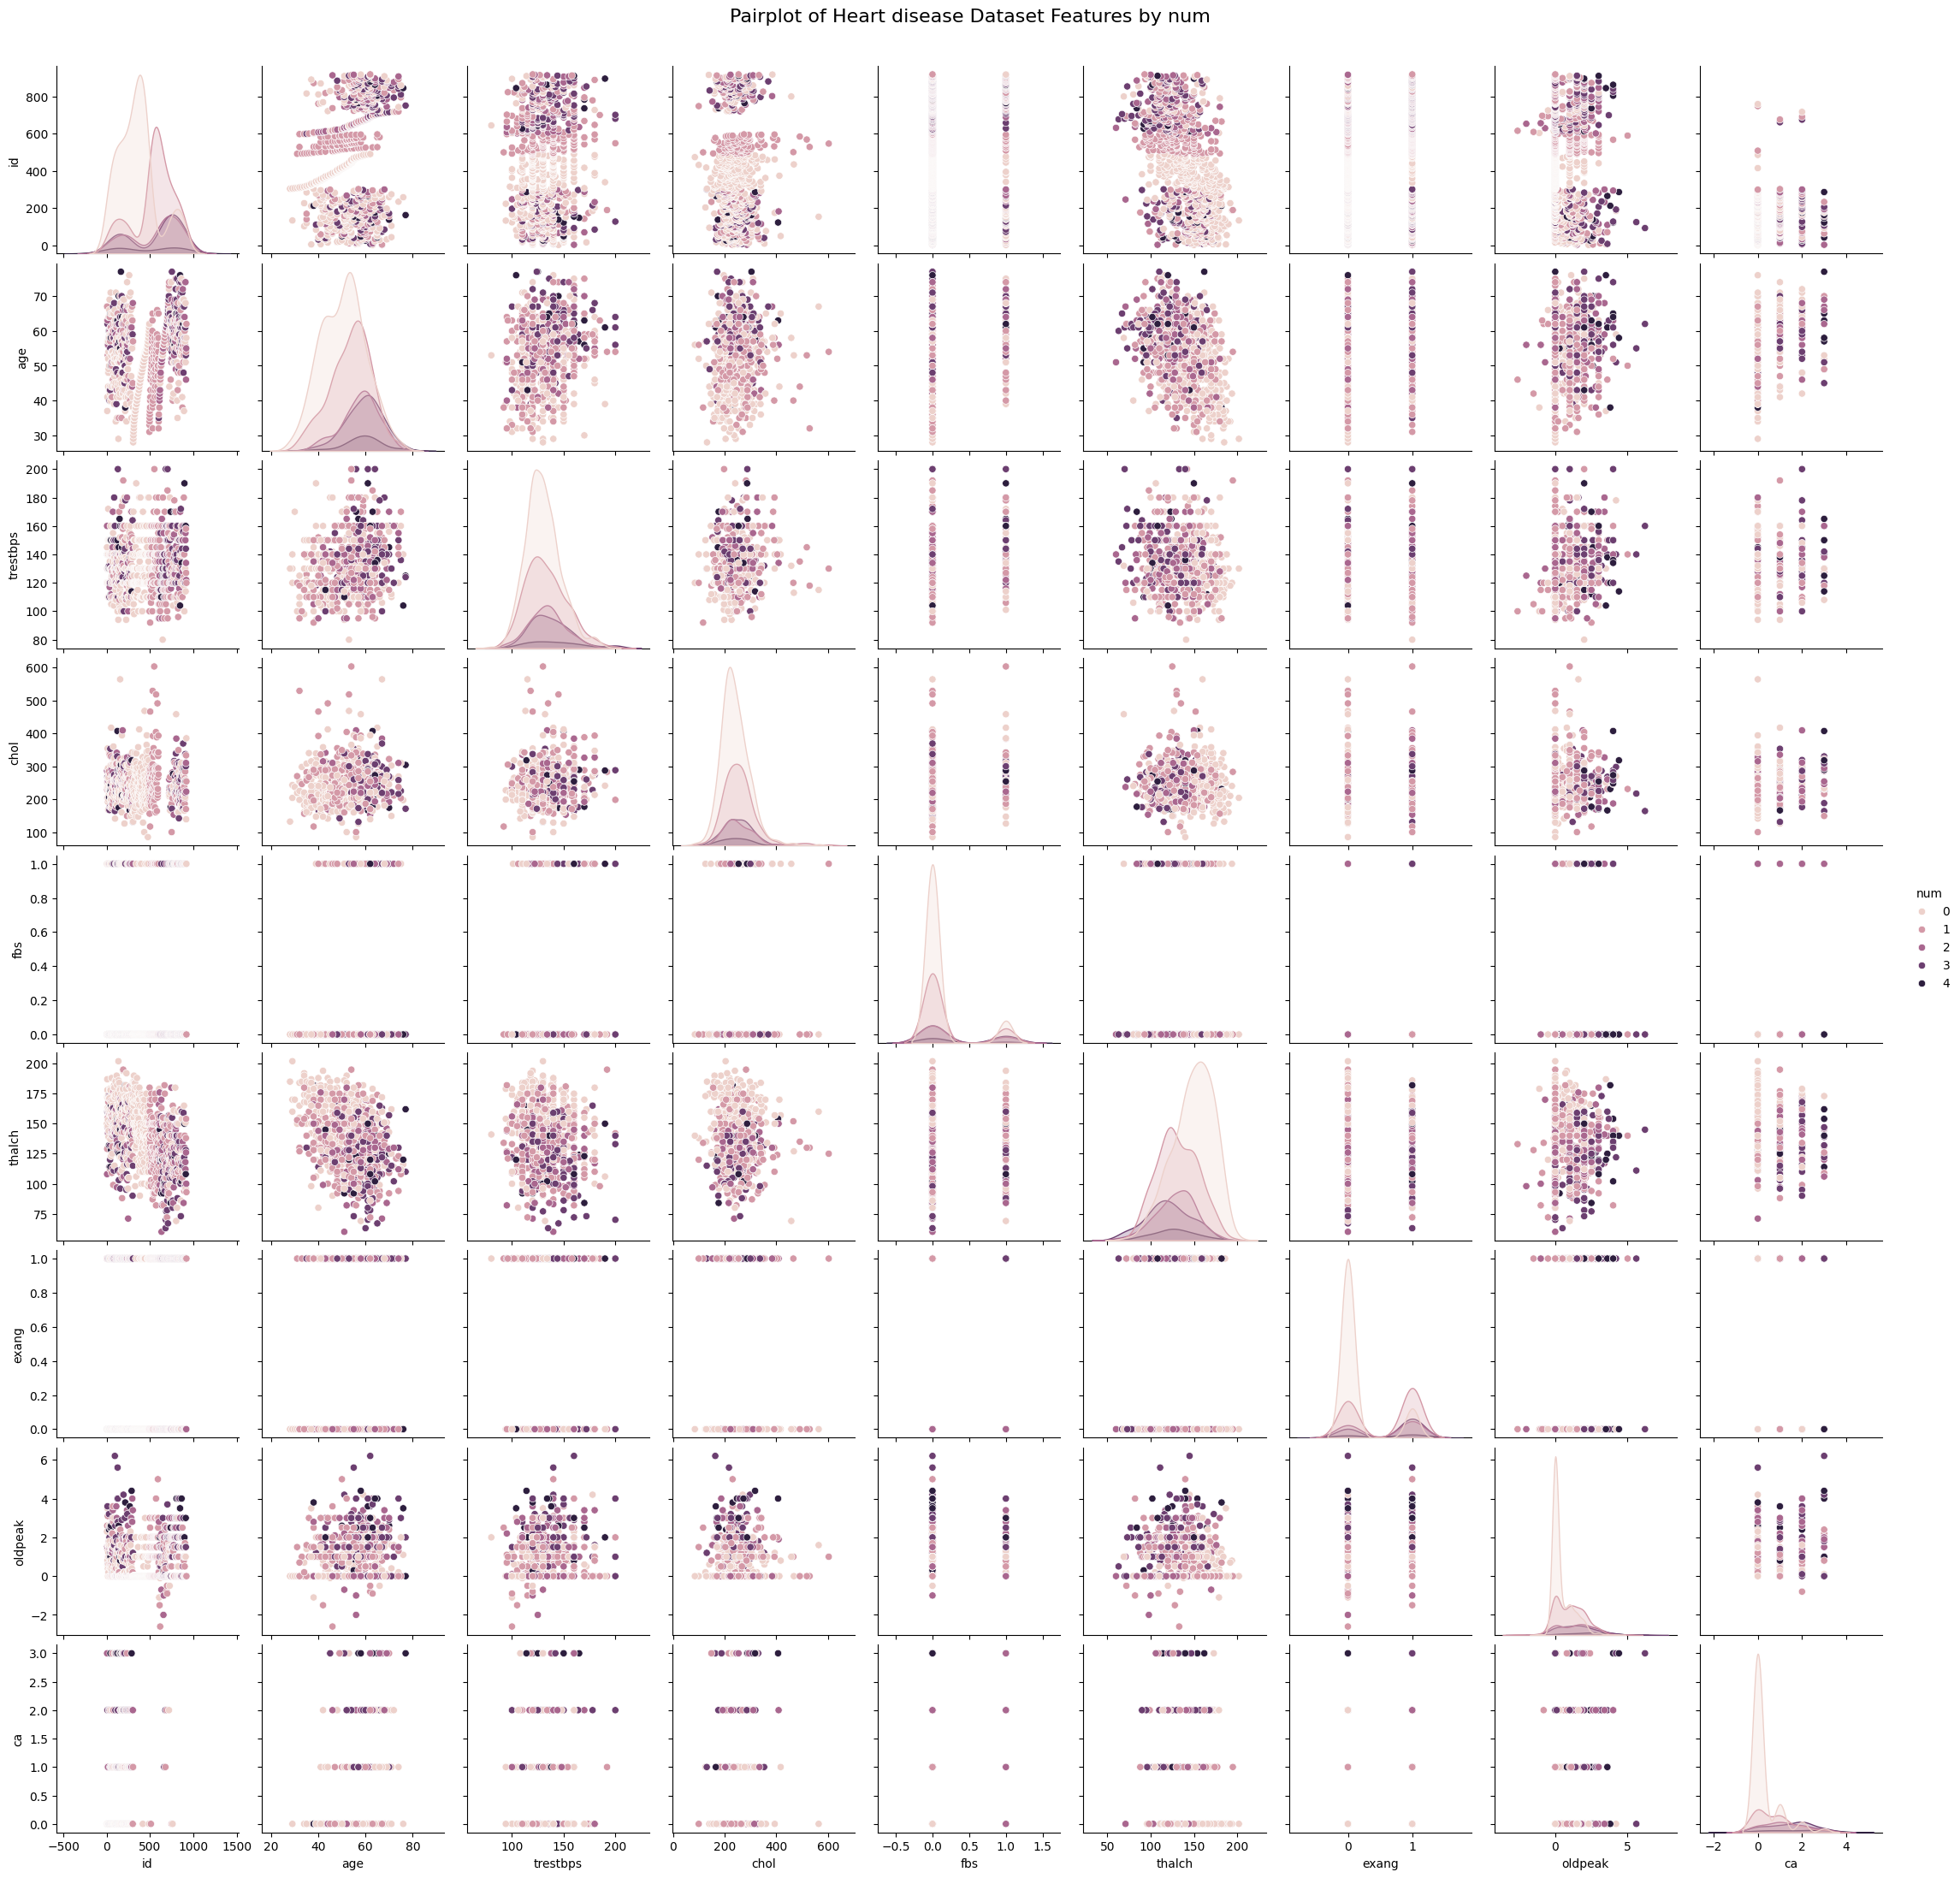

In [35]:
# Create the pairplot and capture the figure
f = sns.pairplot(data=df, hue='num')

f.figure.suptitle('Pairplot of Heart disease Dataset Features by num', fontsize=16)
f.figure.subplots_adjust(top=0.95)
plt.show()

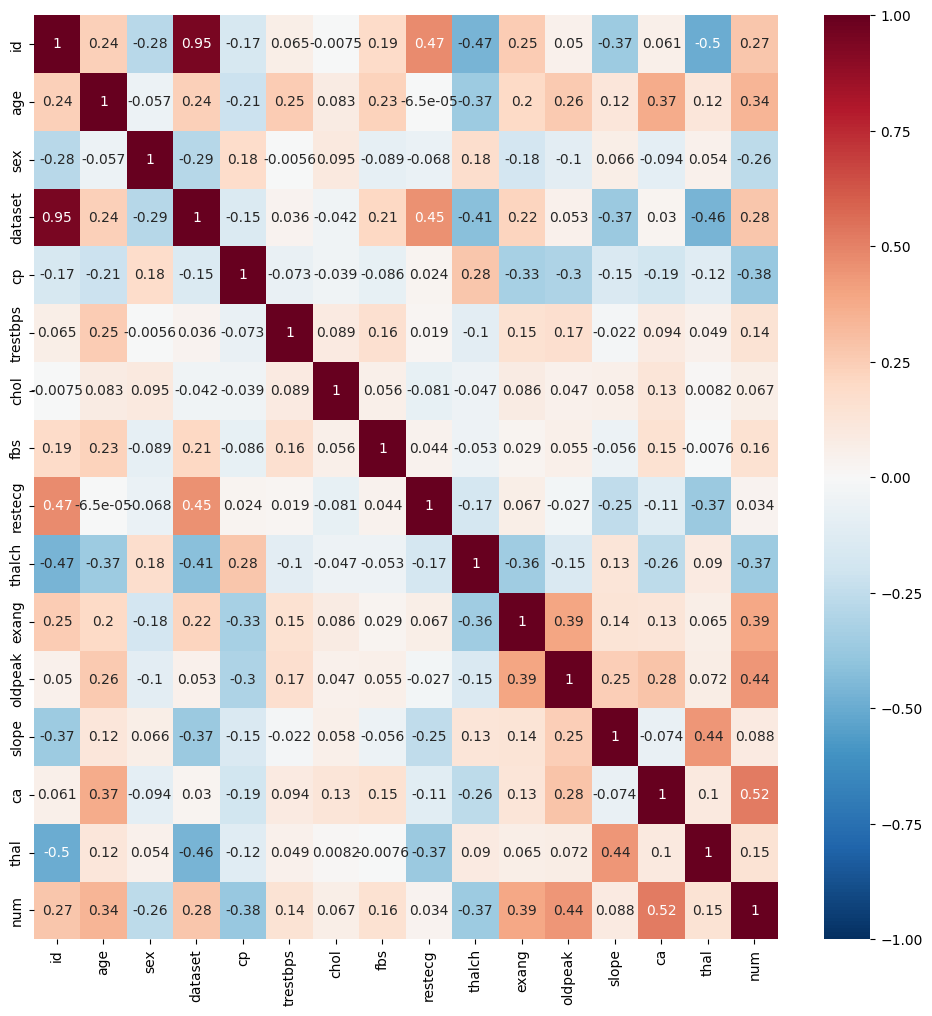

In [36]:
plt.figure(figsize=(12, 12))
# Convert dataset elements to numeric
df['sex'] = pd.factorize(df['sex'])[0]
df['dataset'] = pd.factorize(df['dataset'])[0]
df['cp'] = pd.factorize(df['cp'])[0]
df['restecg'] = pd.factorize(df['restecg'])[0]
df['slope'] = pd.factorize(df['slope'])[0]
df['thal'] = pd.factorize(df['thal'])[0]


sns.heatmap(df.corr(), vmin = -1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()